## Seattle AirBnB Data

In this project we are going to investigate the Seattle AirBnB data from Kaggle (https://www.kaggle.com/datasets/airbnb/seattle?resource=download) to generate business insights.

In [242]:
#imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [243]:

df_listings = pd.read_csv('Seattle AirBnB Data/listings.csv')


In [244]:
df_listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [245]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [246]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

We are going to investigate the driving factors behind achieving a high average review score. We note that the target column is review_scores_rating and hence we will drop any rows that do not have a review_scores_rating

In [247]:
#drop rows with na target column
df_listings = df_listings.dropna(subset = ['review_scores_rating'], how = 'any')

We want to take a look at the distribution of the review scores

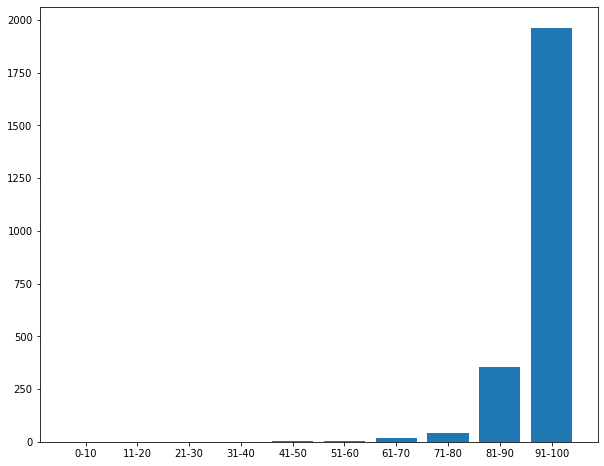

In [248]:
#group the scores in bin sizes of 10
bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

         
grouped_review_scores = df_listings.groupby(pd.cut(df_listings['review_scores_rating'], bins=bins, labels=labels, right=False)).size().reset_index(name='count')
plt.figure(figsize=(10,8))
plt.bar(grouped_review_scores['review_scores_rating'], grouped_review_scores['count']);

We pull out some summary statistics on the review_scores_rating

In [249]:
df_listings['review_scores_rating'].mean()

94.53926206244087

In [250]:
df_listings['review_scores_rating'].min()

20.0

In [251]:
df_listings['review_scores_rating'].max()

100.0

In [252]:
df_listings['review_scores_rating'].mode()

0    100.0
Name: review_scores_rating, dtype: float64

## What makes a good review? 

We want to investigate the make up of a good review from the subcategories of the review.

In [253]:
#Select only the relevant columns
df_reviews = df_listings[['review_scores_rating','review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 
                          'review_scores_communication','review_scores_value',      
                        'review_scores_location']]

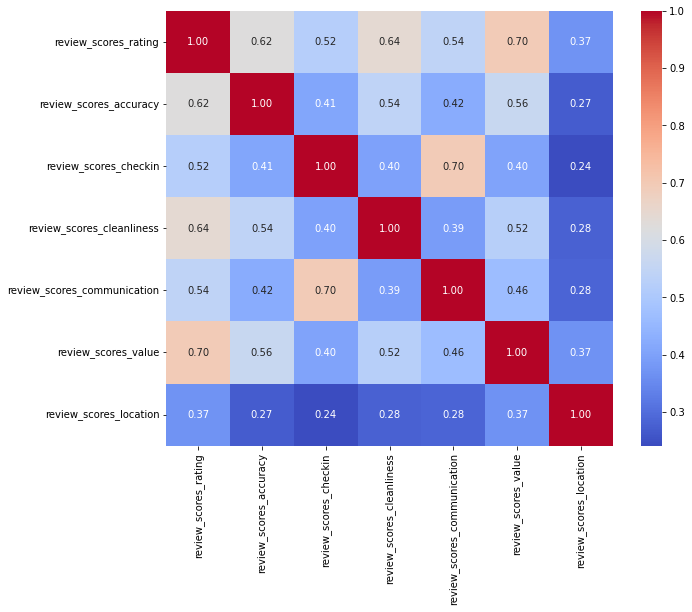

In [254]:
plt.figure(figsize=(10,8))
sns.heatmap(df_reviews.corr(), cmap='coolwarm', annot=True, fmt=".2f");

## What are the other factors to a good review? 

We now want to look at what the other factors are to a good review.

We first need to clean the data

In [255]:
#select the categorical variables
cat_vars = df_listings.select_dtypes(include = ['object'])

We note that the range of values in the experiences offered column is none, so we can remove this later on. 

In [256]:
cat_vars['experiences_offered'].unique()

array(['none'], dtype=object)

In [257]:
cat_vars.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

We inspect the variables, and note that most of these won't be relevant to us using the methods that we plan to use. Hence we will only keep certain variables.

In [258]:
cat_vars = cat_vars[['instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']]

We do the same activity for the whole dataset, noting that certain columns (id) won't provide any insight. 

In [259]:
df_listing_insights = df_listings[['review_scores_rating', 'reviews_per_month', 'bathrooms', 'number_of_reviews', 
                                   'bedrooms', 'minimum_nights', 'beds', 'guests_included', 'accommodates', 
                                   'maximum_nights', 'availability_90','latitude','longitude','availability_365', 
                                   'availability_60', 'availability_30', 'host_total_listings_count' ,
                                   'host_listings_count', 'calculated_host_listings_count','instant_bookable', 
                                   'cancellation_policy', 'require_guest_profile_picture', 
                                   'require_guest_phone_verification']]

In [260]:
cat_vars_columns = df_listing_insights.select_dtypes(include = ['object']).copy().columns

In [261]:
cat_vars_columns

Index(['instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

We now need to get dummy variables for our categorical columns.

In [262]:

for col in cat_vars_columns:
    df_listing_insights= pd.concat([df_listing_insights.drop(col, axis = 1), 
                                      pd.get_dummies(df_listing_insights[col], prefix= col,
                                                prefix_sep='_', drop_first=True)], axis = 1)

In [263]:
df_listing_insights

,review_scores_rating,reviews_per_month,bathrooms,number_of_reviews,bedrooms,minimum_nights,beds,guests_included,accommodates,maximum_nights,...,availability_60,availability_30,host_total_listings_count,host_listings_count,calculated_host_listings_count,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,95.0,4.07,1.0,207,1.0,1,1.0,2,4,365,...,41,14,3.0,3.0,2,0,1,0,0,0
1,96.0,1.48,1.0,43,1.0,2,1.0,1,4,90,...,13,13,6.0,6.0,6,0,0,1,1,1
2,97.0,1.15,4.5,20,5.0,4,7.0,10,11,30,...,6,1,2.0,2.0,2,0,0,1,0,0
4,92.0,0.89,2.0,38,3.0,1,3.0,6,6,1125,...,60,30,2.0,2.0,1,0,0,1,0,0
5,95.0,2.45,1.0,17,1.0,1,1.0,1,2,6,...,0,0,1.0,1.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,92.0,1.56,1.0,5,2.0,2,3.0,4,5,14,...,43,13,1.0,1.0,1,0,0,1,0,0
3811,100.0,0.63,1.0,2,1.0,1,1.0,1,3,1125,...,10,2,1.0,1.0,1,0,1,0,0,0
3812,96.0,4.01,1.0,73,1.0,3,2.0,2,4,365,...,30,11,3.0,3.0,3,1,1,0,1,1
3813,80.0,0.30,2.0,1,3.0,3,3.0,1,6,1125,...,32,18,354.0,354.0,8,0,0,1,0,0


We can now look at the correlation between the feature variables and our target variable (review_scores_rating)

In [264]:
df_listing_insights.corr()[['review_scores_rating']].sort_values(by = 'review_scores_rating', ascending = False)

,review_scores_rating
review_scores_rating,1.000000
reviews_per_month,0.087313
bathrooms,0.045101
number_of_reviews,0.036242
bedrooms,0.023257
cancellation_policy_moderate,0.014990
instant_bookable_t,0.006071
minimum_nights,0.001392
require_guest_phone_verification_t,-0.000101
beds,-0.000720


## What do high performing properties do? 

In [265]:
#select the properties with a 100% rating
df_top_ratings = df_listing_insights[df_listing_insights['review_scores_rating'] == 100]

In [266]:
df_top_ratings

,review_scores_rating,reviews_per_month,bathrooms,number_of_reviews,bedrooms,minimum_nights,beds,guests_included,accommodates,maximum_nights,...,availability_60,availability_30,host_total_listings_count,host_listings_count,calculated_host_listings_count,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
13,100.0,3.00,1.0,3,2.0,2,3.0,4,5,1125,...,40,13,1.0,1.0,1,0,0,1,0,0
20,100.0,1.00,1.0,1,1.0,1,1.0,1,1,1125,...,55,29,1.0,1.0,1,0,0,0,0,0
22,100.0,0.86,2.0,1,4.0,4,4.0,1,8,1125,...,0,0,1.0,1.0,1,0,0,0,0,0
24,100.0,0.18,2.5,1,3.0,3,3.0,1,5,1125,...,0,0,1.0,1.0,1,0,1,0,0,0
25,100.0,1.30,2.5,8,3.0,4,5.0,6,8,1125,...,3,0,2.0,2.0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,100.0,1.00,1.0,1,0.0,3,1.0,2,2,1125,...,2,2,1.0,1.0,1,0,0,1,0,0
3801,100.0,2.05,1.0,28,1.0,4,1.0,2,2,1125,...,56,30,1.0,1.0,1,0,1,0,0,0
3806,100.0,0.24,1.0,1,2.0,1,2.0,1,4,1125,...,0,0,2.0,2.0,2,0,0,0,0,0
3811,100.0,0.63,1.0,2,1.0,1,1.0,1,3,1125,...,10,2,1.0,1.0,1,0,1,0,0,0


781 properties with a 100% rating

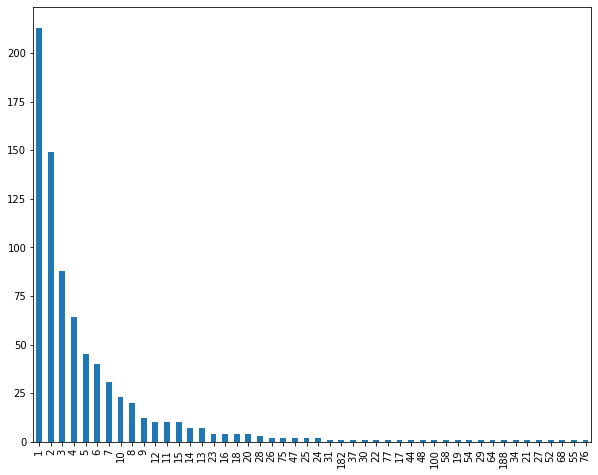

In [267]:
top_ratings_num_of_reviews = df_top_ratings['number_of_reviews'].value_counts()
plt.figure(figsize = (10,8))
top_ratings_num_of_reviews.plot(kind = 'bar');

In [268]:
#select the high performing properties with 10 or more reviews
df_top_ratings = df_top_ratings[df_top_ratings['number_of_reviews'] >= 10]

In [269]:
df_top_ratings

,review_scores_rating,reviews_per_month,bathrooms,number_of_reviews,bedrooms,minimum_nights,beds,guests_included,accommodates,maximum_nights,...,availability_60,availability_30,host_total_listings_count,host_listings_count,calculated_host_listings_count,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
56,100.0,2.50,1.0,10,1.0,1,1.0,1,2,1125,...,60,30,1.0,1.0,1,0,0,0,0,0
82,100.0,2.11,1.5,48,1.0,3,1.0,0,2,1125,...,49,27,1.0,1.0,1,0,0,1,0,0
105,100.0,0.77,1.0,12,2.0,5,4.0,1,5,1125,...,35,12,2.0,2.0,2,0,0,1,0,0
136,100.0,0.68,1.0,20,1.0,2,1.0,1,1,10,...,60,30,1.0,1.0,1,0,1,0,0,0
199,100.0,2.27,1.0,15,1.0,2,1.0,1,2,28,...,60,30,1.0,1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,100.0,2.43,1.0,12,1.0,2,1.0,1,2,1125,...,0,0,3.0,3.0,2,0,0,1,0,0
3715,100.0,6.20,1.0,76,1.0,2,1.0,1,2,30,...,47,22,1.0,1.0,1,0,1,0,0,0
3764,100.0,3.79,1.0,11,1.0,1,2.0,2,3,1125,...,44,23,1.0,1.0,1,0,0,1,0,0
3791,100.0,2.48,1.0,11,1.0,2,1.0,1,2,30,...,59,29,1.0,1.0,1,0,1,0,0,0


119 properties with a 100% review rating and 10 or more reviews

In [270]:
df_top_ratings.describe()

,review_scores_rating,reviews_per_month,bathrooms,number_of_reviews,bedrooms,minimum_nights,beds,guests_included,accommodates,maximum_nights,...,availability_60,availability_30,host_total_listings_count,host_listings_count,calculated_host_listings_count,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
count,119.0,119.000000,119.000000,119.000000,118.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,100.0,2.420588,1.344538,24.521008,1.355932,2.210084,1.705882,1.722689,3.235294,656.252101,...,35.218487,15.563025,4.268908,4.268908,1.915966,0.168067,0.403361,0.436975,0.058824,0.075630
std,0.0,1.703027,0.630267,27.414845,0.842518,2.848949,1.044379,1.241407,1.783664,519.383145,...,21.133217,11.563120,16.177876,16.177876,1.839214,0.375507,0.492646,0.498109,0.236289,0.265524
min,100.0,0.190000,1.000000,10.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.0,1.115000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,2.000000,30.000000,...,19.500000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.0,2.280000,1.000000,15.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1125.000000,...,41.000000,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.0,3.240000,1.500000,24.500000,2.000000,2.000000,2.000000,2.000000,4.000000,1125.000000,...,54.000000,27.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,100.0,10.950000,4.500000,188.000000,5.000000,31.000000,6.000000,6.000000,9.000000,1125.000000,...,60.000000,30.000000,169.000000,169.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [271]:
df_listings_insights.describe()

,square_feet,reviews_per_month,bathrooms,number_of_reviews,bedrooms,minimum_nights,beds,guests_included,accommodates,maximum_nights,availability_90,latitude,longitude,availability_365,availability_60,availability_30,host_total_listings_count,host_listings_count,calculated_host_listings_count,require_guest_phone_verification_t
count,91.000000,3171.000000,3159.000000,3171.000000,3165.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,809.043956,2.089722,1.258943,26.751498,1.302686,2.395774,1.742353,1.708294,3.384421,753.925576,59.277515,47.628684,-122.332870,249.134342,37.428256,16.965941,6.933459,6.933459,2.990224,0.109745
std,637.369732,1.822827,0.594381,39.914223,0.874565,17.850468,1.154951,1.308209,1.991495,1836.189972,32.908399,0.042962,0.031571,122.422523,22.698243,11.894520,25.541214,25.541214,5.955426,0.312620
min,0.000000,0.020000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,47.505088,-122.417219,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,375.000000,0.705000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,31.000000,33.000000,47.608762,-122.353981,140.500000,18.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,730.000000,1.550000,1.000000,13.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1125.000000,74.000000,47.623076,-122.328980,310.000000,46.000000,20.000000,1.000000,1.000000,1.000000,0.000000
75%,1200.000000,3.010000,1.000000,32.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1125.000000,88.000000,47.662419,-122.310570,358.000000,59.000000,29.000000,3.000000,3.000000,2.000000,0.000000
max,3000.000000,12.150000,8.000000,474.000000,7.000000,1000.000000,15.000000,13.000000,16.000000,100000.000000,90.000000,47.733358,-122.254189,365.000000,60.000000,30.000000,502.000000,502.000000,37.000000,1.000000


In [272]:
#analyse the differences in means between the top performing properties and the overall average

Differences_columns = ['Column','Mean of top ratings', 'Mean of all', 'Difference']
Differences_df = pd.DataFrame(columns = Differences_columns)

for col in df_top_ratings.columns:
    top_ratings_mean = df_top_ratings[col].mean()
    
    try:
        all_properties_mean = df_listings_insights[col].mean()
    except: 
        continue
    difference = top_ratings_mean-all_properties_mean
    
    Mean_dict = {'Column': col, 'Mean of top ratings': top_ratings_mean, 'Mean of all': all_properties_mean, 'Difference': difference}
    Mean_data = pd.DataFrame([Mean_dict])
    
    Differences_df = pd.concat([Differences_df, Mean_data], axis = 0)

In [273]:
Differences_df

,Column,Mean of top ratings,Mean of all,Difference
0,reviews_per_month,2.420588,2.089722,0.330866
0,bathrooms,1.344538,1.258943,0.085595
0,number_of_reviews,24.521008,26.751498,-2.230490
0,bedrooms,1.355932,1.302686,0.053247
0,minimum_nights,2.210084,2.395774,-0.185690
0,beds,1.705882,1.742353,-0.036470
0,guests_included,1.722689,1.708294,0.014395
0,accommodates,3.235294,3.384421,-0.149127
0,maximum_nights,656.252101,753.925576,-97.673475
0,availability_90,57.075630,59.277515,-2.201885


In [274]:
#calculate % difference
Differences_df['Difference %'] = (Differences_df['Difference']/Differences_df['Mean of all'])

In [275]:
Differences_df.sort_values(by= 'Difference %', key= lambda x: x.abs(), ascending = False)

,Column,Mean of top ratings,Mean of all,Difference,Difference %
0,host_total_listings_count,4.268908,6.933459,-2.664552,-0.384303
0,host_listings_count,4.268908,6.933459,-2.664552,-0.384303
0,calculated_host_listings_count,1.915966,2.990224,-1.074258,-0.359257
0,require_guest_phone_verification_t,0.075630,0.109745,-0.034114,-0.310852
0,reviews_per_month,2.420588,2.089722,0.330866,0.158330
0,maximum_nights,656.252101,753.925576,-97.673475,-0.129553
0,number_of_reviews,24.521008,26.751498,-2.230490,-0.083378
0,availability_30,15.563025,16.965941,-1.402916,-0.082690
0,minimum_nights,2.210084,2.395774,-0.185690,-0.077507
0,bathrooms,1.344538,1.258943,0.085595,0.067990


## Can we predict the average rating?

Let's start to build a predictive model. 

In [276]:
df_listing_insights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   review_scores_rating                3171 non-null   float64
 1   reviews_per_month                   3171 non-null   float64
 2   bathrooms                           3159 non-null   float64
 3   number_of_reviews                   3171 non-null   int64  
 4   bedrooms                            3165 non-null   float64
 5   minimum_nights                      3171 non-null   int64  
 6   beds                                3171 non-null   float64
 7   guests_included                     3171 non-null   int64  
 8   accommodates                        3171 non-null   int64  
 9   maximum_nights                      3171 non-null   int64  
 10  availability_90                     3171 non-null   int64  
 11  latitude                            3171 no

Only the bathrooms and bedrooms columns contain null values, so we will fill these with the mean rounded to the nearest integer.

In [277]:
df_listing_insights = df_listing_insights.apply(lambda col: col.fillna(round(col.mean())))

In [278]:
df_listing_insights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   review_scores_rating                3171 non-null   float64
 1   reviews_per_month                   3171 non-null   float64
 2   bathrooms                           3171 non-null   float64
 3   number_of_reviews                   3171 non-null   int64  
 4   bedrooms                            3171 non-null   float64
 5   minimum_nights                      3171 non-null   int64  
 6   beds                                3171 non-null   float64
 7   guests_included                     3171 non-null   int64  
 8   accommodates                        3171 non-null   int64  
 9   maximum_nights                      3171 non-null   int64  
 10  availability_90                     3171 non-null   int64  
 11  latitude                            3171 no

In [289]:
#we need to normalise the data
scaler = MinMaxScaler()
normalized_data_listing_insights = scaler.fit_transform(df_listing_insights)
normalized_df_listing_insights = pd.DataFrame(normalized_data_listing_insights, columns = df_listing_insights.columns)

In [280]:
normalized_df_listing_insights

,review_scores_rating,reviews_per_month,bathrooms,number_of_reviews,bedrooms,minimum_nights,beds,guests_included,accommodates,maximum_nights,...,availability_60,availability_30,host_total_listings_count,host_listings_count,calculated_host_listings_count,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0.9375,0.333883,0.1250,0.435518,0.142857,0.000000,0.000000,0.153846,0.200000,0.00364,...,0.683333,0.466667,0.003992,0.003992,0.027778,0.0,1.0,0.0,0.0,0.0
1,0.9500,0.120363,0.1250,0.088795,0.142857,0.001001,0.000000,0.076923,0.200000,0.00089,...,0.216667,0.433333,0.009980,0.009980,0.138889,0.0,0.0,1.0,1.0,1.0
2,0.9625,0.093157,0.5625,0.040169,0.714286,0.003003,0.428571,0.769231,0.666667,0.00029,...,0.100000,0.033333,0.001996,0.001996,0.027778,0.0,0.0,1.0,0.0,0.0
3,0.9000,0.071723,0.2500,0.078224,0.428571,0.000000,0.142857,0.461538,0.333333,0.01124,...,1.000000,1.000000,0.001996,0.001996,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.9375,0.200330,0.1250,0.033827,0.142857,0.000000,0.000000,0.076923,0.066667,0.00005,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,0.9000,0.126958,0.1250,0.008457,0.285714,0.001001,0.142857,0.307692,0.266667,0.00013,...,0.716667,0.433333,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
3167,1.0000,0.050289,0.1250,0.002114,0.142857,0.000000,0.000000,0.076923,0.133333,0.01124,...,0.166667,0.066667,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
3168,0.9500,0.328937,0.1250,0.152220,0.142857,0.002002,0.071429,0.153846,0.200000,0.00364,...,0.500000,0.366667,0.003992,0.003992,0.055556,1.0,1.0,0.0,1.0,1.0
3169,0.7500,0.023083,0.2500,0.000000,0.428571,0.002002,0.142857,0.076923,0.333333,0.01124,...,0.533333,0.600000,0.704591,0.704591,0.194444,0.0,0.0,1.0,0.0,0.0


In [281]:
X = normalized_df_listing_insights.drop(['review_scores_rating'], axis = 1)
Y = normalized_df_listing_insights['review_scores_rating']

In [282]:
#create the test and training data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .33, random_state= 42 )

In [283]:
#initialise the model
lm_model = LinearRegression()

In [284]:
#fit the model
lm_model.fit(X_train, y_train)

LinearRegression()

In [285]:
#use the model to predict values
y_test_preds = lm_model.predict(X_test)

In [286]:
#test the model
r2_score(y_test, y_test_preds)

-0.9464546595211751

In [287]:
y_train_preds = lm_model.predict(X_train)

In [288]:
r2_score(y_train, y_train_preds)

0.07670580175940245